In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
def RMSE(y_true, y_pred):
  residuals = y_true-y_pred
  squared_residuals = residuals**2
  mse = np.mean(squared_residuals)
  rmse = np.sqrt(mse)
  return rmse

In [ ]:
def MAE(y_true, y_pred):
  residuals = y_true - y_pred
  absolute_residuals = np.abs(residuals)
  mae = np.mean(absolute_residuals)
  return mae

In [ ]:
def R2(y_true, y_pred):
  residuals = y_true - y_pred
  squared_residuals = residuals**2
  mse = np.mean(squared_residuals)
  variance = np.var(y_true)
  r2 = 1 - (mse/variance)
  return r2

In [ ]:
#step 1: Initializing parameters
def initialize_parameters(nooffeatures):
  w = np.zeros((nooffeatures, 1))
  b = 0;
  return w,b

In [ ]:
#Step 2: Define the prediction Function
def predict(X,w,b):
  return np.dot(X,w)+b

In [ ]:
#step3: Defining cost function
def cost_function(X,y,w,b):
  m = len(y)
  y_pred = predict(X,w,b)
  cost = (1/(2*m))*np.sum((y-y_pred)**2)
  return cost

In [ ]:
#step 4: Optimizing using gradient descent
def gradient_descent(X,y,w,b, learning_rate,num_iterations):
  m = len(y)
  for i in range(num_iterations):
    y_pred = predict(X,w,b)
    dw = (1/m) * np.dot(X.T,(y_pred - y))
    db = (1/m) * np.sum((y_pred - y))

    w -= learning_rate * dw
    b -= learning_rate *db
    if i % 100 == 0:
      cost = cost_function(X, y, w, b)
      print(f"Iteration {i}, Cost: {cost}")

  return w,b



Iteration 0, Cost: 0.5373714538582052
Iteration 100, Cost: 0.37398818425104036
Iteration 200, Cost: 0.2915147103986343
Iteration 300, Cost: 0.24206019323689243
Iteration 400, Cost: 0.2089013833121982
Iteration 500, Cost: 0.18508485442856687
Iteration 600, Cost: 0.16718221640266626
Iteration 700, Cost: 0.15327194188349422
Iteration 800, Cost: 0.14218348442897827
Iteration 900, Cost: 0.13316365635366934

Train MAE: 0.34369230546086826
Test MAE: 0.3428891765815914
Train MSE: 0.5015489816297017
Test MSE: 0.4998706823071893
Train R2: 0.6927392003353272
Test R2: 0.6951847988019845

Test Set Comparison:
   Actual Precip_log  Predicted Precip_log  Actual Precip  Predicted Precip
0           2.066863              1.286070           6.90          2.618539
1           2.129421              1.402948           7.41          3.067172
2           2.984671              2.018815          18.78          6.529395
3           0.000000             -0.117966           0.00          0.111274
4           0.00

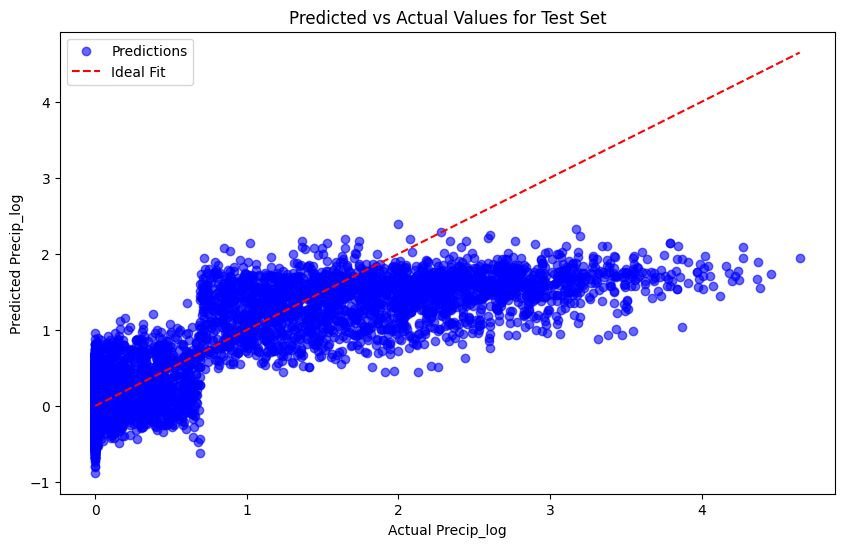

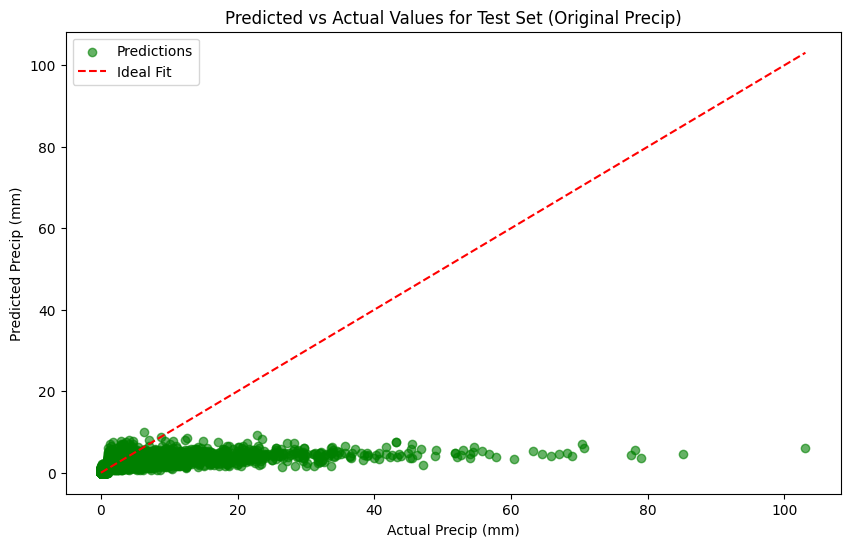

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/filtered_climate_data_final.csv")

# Apply log transformation to Precip
df['Precip_log'] = np.log1p(df['Precip'])  # log(1 + Precip)

# Define features (X) and target (y)
X = df.drop(columns=["Precip", "Precip_log"])  # Drop original and transformed target
y = df["Precip_log"].values.reshape(-1, 1)  # Use log-transformed Precip


# Check if the transformation worked
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

w, b = initialize_parameters(X.shape[1])

# Train model using gradient descent
w, b = gradient_descent(X_train, y_train, w, b, learning_rate=0.001, num_iterations=1000)

# Predictions
y_pred_test = predict(X_test, w, b)
y_pred_train = predict(X_train, w, b)

# Compute metrics
train_mse = RMSE(y_train, y_pred_train)
test_mse = RMSE(y_test, y_pred_test)

train_MAE = MAE(y_train, y_pred_train)
test_MAE = MAE(y_test, y_pred_test)

train_R2 = R2(y_train, y_pred_train)
test_R2 = R2(y_test, y_pred_test)

# Print results
print(f"\nTrain MAE: {train_MAE}")
print(f"Test MAE: {test_MAE}")
print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Train R2: {train_R2}")
print(f"Test R2: {test_R2}")

# Convert predictions back to original precipitation values
results_test = pd.DataFrame({
    'Actual Precip_log': y_test.flatten(),
    'Predicted Precip_log': y_pred_test.flatten(),
    'Actual Precip': np.expm1(y_test.flatten()),  # Convert back using expm1
    'Predicted Precip': np.expm1(y_pred_test.flatten())  # Convert back using expm1
})

# Set all negative precipitation predictions to zero
results_test["Predicted Precip"] = np.abs(results_test["Predicted Precip"])

print("\nTest Set Comparison:")
print(results_test.head())

# Train set results
results_train = pd.DataFrame({
    'Actual Precip_log': y_train.flatten(),
    'Predicted Precip_log': y_pred_train.flatten(),
    'Actual Precip': np.expm1(y_train.flatten()),  # Convert back using expm1
    'Predicted Precip': np.expm1(y_pred_train.flatten())  # Convert back using expm1
})

# Set negative values to zero
results_train["Predicted Precip"] = np.abs(results_train["Predicted Precip"])

print("\nTrain Set Comparison:")
print(results_train.head())

# Plot Predicted vs Actual values for Test Set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.6, label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label="Ideal Fit")
plt.title('Predicted vs Actual Values for Test Set')
plt.xlabel('Actual Precip_log')
plt.ylabel('Predicted Precip_log')
plt.legend()
plt.show()

# Plot Predicted vs Actual values for Test Set (Original Precip)
plt.figure(figsize=(10, 6))
plt.scatter(results_test["Actual Precip"], results_test["Predicted Precip"], color='green', alpha=0.6, label="Predictions")
plt.plot([results_test["Actual Precip"].min(), results_test["Actual Precip"].max()],
         [results_test["Actual Precip"].min(), results_test["Actual Precip"].max()],
         color='red', linestyle='--', label="Ideal Fit")
plt.title('Predicted vs Actual Values for Test Set (Original Precip)')
plt.xlabel('Actual Precip (mm)')
plt.ylabel('Predicted Precip (mm)')
plt.legend()
plt.show()